<a href="https://colab.research.google.com/github/azamor18/azamor18/blob/main/Curso%202/Data%20Analysis%20with%20Python%20Module%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analysis with Python
#Module 5
#Antonio Zamora Sánchez
#A01794117

#Evaluacion de Modelos


La evaluacion de modelos nos dice como se desempeña nuestro modelo en el mundo real

En el modulo anterior "in sample model" nos habla de como nuestro modelo se ajusta a los datos ya existentes y entrenados, esto no nos da un estimado de que tan bien nuestro modelo entrenado puede predecir un dato.

La solucion es distribuir los datos , usando un sample data o entrenando los datos del modelo, el resto de los datos llamado datos de pruebason usados como out of sample data.

Los datos de prueba, son usados para aproximar el modelo al mundo real, separando la informacion en datos de entrenamiento y datos de prueba o validacion 


Datos de prueba o validacion son usados paa tener una idea como nuestro modelo se desempeña en el mundo real, usalmente el mayor % se distribuye a datos de entrenamiento por ejemplo 70% y para prueba un 30%

Se usan los datos de entrenamiento para construir un modelo y descubrir relaciones de preduccion, despues evaluamos el mejor desempeño

Luego usamos datos de prueba para evaluar el desempeño del modelo

Cuando tenemos completo nuestra evaluacion del modelo, se recomienda usar todos los datos para validar el modelo


para lo anterior, de la libreria scikit learn , del paquete de split, se usa la funcion Train_Test_ Split Function - lo cual splitea aleatoriament los datos en entrenamiento y validacion.

split.function separa aleatoriamente


Para revisar o resolver el problema de que los datos no tienen tanta variación pero no tienen exactitud (centrado) se usa cross validation

funcion para cross validation 
cross_val_score() function. es importado de la libreria de sklearn model section
el primer parametro dentro del parentesis es el tipo de modelo a usar lr, regresion lineal como ejemplo, luego las X predictoras y la Y de prediccion
cv= es el numero de particiones, lo que refiere que va a separar el conjunto de datos iguales .

La funcion regresa un array 

En resumen

tienes un set de datos
despues se particiona en datos de entrenamiento (mayor porcentaje) y datos de validacion (menor porcentaje)

luego se ingresan al modelo (cross val) y 1 de validacion y 2 de entrenamiento 

El resultado será una salida en forma de matriz o array



# OVERFITTING
Si se incrementa demás el orden de los polinomios se va a tener una funcion que describa el desempeño de manera muy pobre, la función va estar oscilando pero no va  ajustar ningun dato

#UNDERFITTING
Tomando como base la regresion polinomial, se trata de buscar el mejor fit, pero si se ocupa una funcion lineal, no será suficiente por que producira mucho errores que no puede abarcar, por que el modelo es muy simple para ajustar todos los datos

Si incrementamos el orden polinomial, se ajusta mejor los datos pero aun presentan underfitting, 

#MODEL SELECTION

#Ridge Regression

Previene Over Fitting, es un gran problema cuando tienes multiples variables independientes 

Cuando haces las regresiones con ordenes arriba de 5, X^5, las magnitudes se vuelven muy grandes, RIDGE controla las magnitudes introduciendo parametros alpha.

Alpha es un parametro que se selecciona antes de hacer el ajuste y entrenamiento del modelo

A mayor alpha, la magnitud del coeficiente será menor
pero es importante escoger alpha, si se escoge un alpha muy grande es posible que los coeficientes se acerquen a 0 y tengamos under fitting
recomendacion 0.01
con 1 primearas señales de underfitting

calcula el MSE y R2

# Grid Search


Esta regression usa Hiperparametros 
calcula el MSE y el R2

Grid search usa hyperparametros, los ingresa a la funcion y va generando modelos y cada modelo genera errores, se selecciona el hiperparametro que minimice el error

para seleccionar el hiperparametro dividimos los datos en tres parts

entrenamiento, validacion y prueba 

entrenamos los datos y usamos R2 o MSE para cada modelo y usamos el hiperparametro que minimice el error y maximice la R2

finalmente probamos los datos 


el valor de grid search contiene un diccionario principalmente contiene a alpha
con sus valores 

importar librerias
crear grid search object
inputs que iran en grid search
parametros y numero de folds
usar r cuadrada
fit the object
best stimator
scores means

se puede normalizar (boolena data true or false)




In [135]:
#LIBRERIAS

import pandas as pd
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [76]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [77]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [78]:
path = path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'

In [79]:
df = pd.read_csv(path)
df.head(5)

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [80]:
y_data = df ['price']
y_data

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name: price, Length: 201, dtype: float64

In [81]:
x_data = df.drop('price',axis=1)
x_data.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,2.68,9.0,111.0,5000.0,21,27,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,2.68,9.0,111.0,5000.0,21,27,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,3.47,9.0,154.0,5000.0,19,26,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,3.40,10.0,102.0,5500.0,24,30,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,3.40,8.0,115.0,5500.0,18,22,13.055556,Medium,0,1


In [82]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.1,random_state=1)
print("number of test samples:", x_test.shape[0])
print("number of training samples:", x_train.shape[0])

number of test samples: 21
number of training samples: 180


In [83]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_data,y_data,test_size=0.4,random_state=0)
print("number of test samples:", x_test1.shape[0])
print("number of training samples:", x_train1.shape[0])

number of test samples: 81
number of training samples: 120


In [84]:
lre = LinearRegression()
lre

LinearRegression()

In [85]:
lre.fit(x_train[['horsepower']],y_train)  # fit the model

LinearRegression()

In [86]:
lre.score(x_test[['horsepower']],y_test)  # calculo de R^2 datos de prueba
print('R^2 =',lre.score(x_test[['horsepower']],y_test))

R^2 = 0.36358755750788263


In [87]:
lre.score(x_train[['horsepower']],y_train)  # calculo de R^2 datos de entrenamiento
print('R^2 =',lre.score(x_train[['horsepower']],y_train))

R^2 = 0.6619724197515104


In [88]:
lre1=LinearRegression()
lre1.fit(x_train1[['horsepower']],y_train1)

LinearRegression()

In [89]:
lre1.score(x_test1[['horsepower']],y_test1)  # calculo de R^2 dato de prueba
print('R^2 =',lre1.score(x_test1[['horsepower']],y_test1))

R^2 = 0.7139364665406973


In [90]:
lre1.score(x_train1[['horsepower']],y_train1)  # calculo de R^2 datos de entrenamiento
print('R^2 =',lre1.score(x_train1[['horsepower']],y_train1))

R^2 = 0.5754067463583004


In [91]:
#Cross Validation

Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [92]:
#media y desviación 
print("The mean of the folds are", Rcross.mean(),"and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


In [93]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [94]:
Rcross1 = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
print("The mean of the folds are", Rcross1.mean(),"and the standard deviation is" , Rcross1.std())

The mean of the folds are 0.5166761697127429 and the standard deviation is 0.07348004195771385


In [95]:
#Cross val pred
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=10)
yhat[0:10]

array([14060.5518458 , 14060.5518458 , 21003.54587305, 12607.36704939,
       14706.41175531, 13899.08686842, 13899.08686842, 13899.08686842,
       18743.03618976, 12445.90207201])

In [96]:
# OVER FITTING
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)


LinearRegression()

In [97]:
#PREDICCION CON DATOS DE ENTRENAMIENTO
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [98]:
#PREDICCION CON DATOS DE PRUEBA
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]


array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

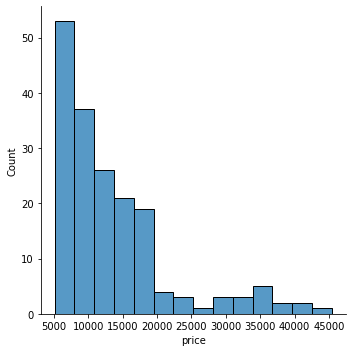

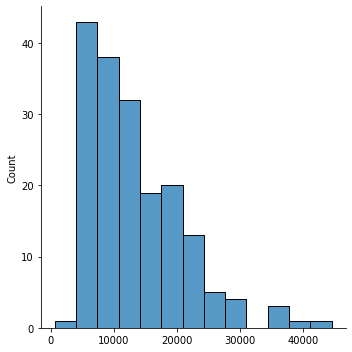

In [100]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
sns.displot(y_train)
sns.displot(yhat_train)

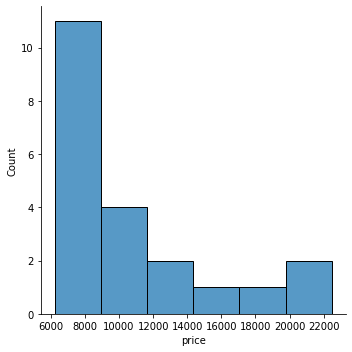

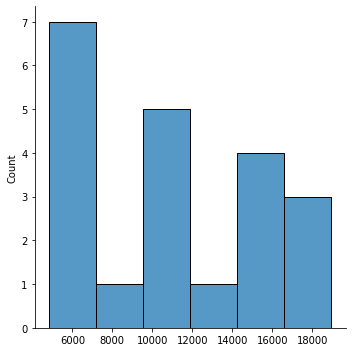

In [101]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
sns.displot(y_test)
sns.displot(yhat_test)

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [103]:
pr=PolynomialFeatures(degree=5)
x_train_pr =pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [104]:
poly = LinearRegression()
poly.fit(x_train_pr,y_train)

LinearRegression()

In [105]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

In [106]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
True values: [ 6295. 10698. 13860. 13499.]


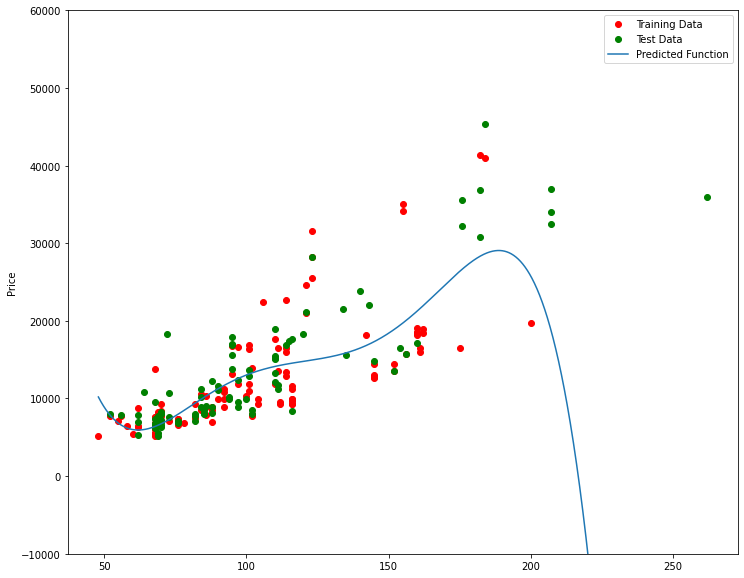

In [107]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [108]:
print('R^2',poly.score(x_train_pr, y_train))

R^2 0.556771690212023


In [109]:
poly.score(x_test_pr, y_test)

-29.87134030204415

Text(3, 0.75, 'Maximum R^2 ')

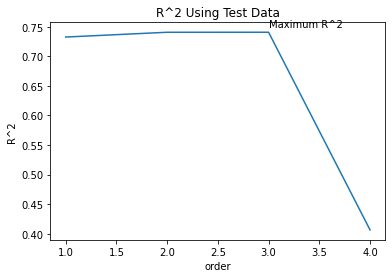

In [110]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')  

In [111]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [112]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [115]:
pr1=PolynomialFeatures(degree=2)
x_train_pr1 =pr1.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])
pr1

PolynomialFeatures()

In [116]:
#Cuantas dimensionas tiene el nuevo arreglo

x_train_pr1.shape

(110, 15)

In [119]:
poly1 = LinearRegression()
poly1.fit(x_train_pr,y_train)


LinearRegression()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


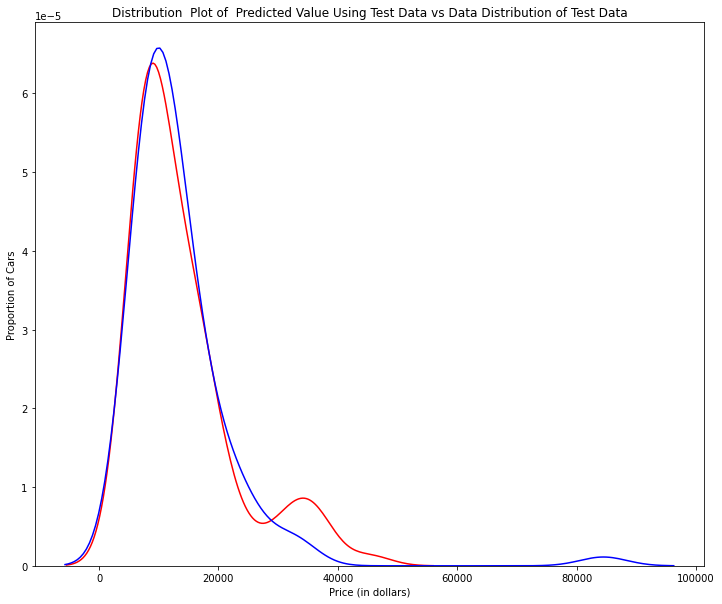

In [125]:
yhat_test1 = poly1.predict(x_test_pr)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

#GRIDE SEARCH

In [127]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [136]:
RR=Ridge()
RR

Ridge()

In [138]:
Grid1= GridSearchCV(RR,parameters1,cv=4)

In [139]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [141]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [142]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151